# AUTHOR G.Vamshi Krishna
### TECHNICAL TASK 1 - PREDICTION USING SUPERVISED ML(LEVEL: BEGINNER)

In [48]:
#Importing numpy and pandas library
import numpy as np
import pandas as pd

In [50]:
#Reading data from limk
URL = 'http://bit.ly/w-data'

In [51]:
df = pd.read_csv(URL)

In [5]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [12]:
df.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


### using 'dtypes' to check data type 

In [15]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

### 'describe()' gives statistical summary of the variable

In [17]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Create scatter plot
create a scatter plat visualization and let manually check if there is any relationship between data

In [18]:
# import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

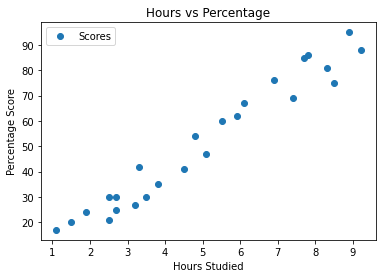

In [19]:
df.plot(x='Hours', y='Scores',style = 'o'
       
       )  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the above graph, we can observe that there is relation between percentage score and Hours studied

# Finding correlation between two variables

In [27]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### measuring strength of correlation by pearson correlation

In [30]:
from scipy import stats 

In [31]:
pearson_coef,p_value= stats.pearsonr(df["Hours"],df["Scores"])

In [40]:
print('pearson correlation coefficient is',pearson_coef)
print('P-value is',p_value)

pearson correlation coefficient is 0.9761906560220885
P-value is 9.132624467459842e-17


#### Since our pearson correlation coefficient is almost equal to 1 and P-value is less than 0.005,we can clearly that there is a  strong relationship between the Explanatory variable(Hours) and Response variable(Scores).

# Training the algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [6]:
x=df['Hours']
y=df['Scores'].values
x=np.array(x).reshape(-1,1)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
print("Number of test sample=",x_test.shape[0])
print("Number of train sample=",x_train.shape[0])

Number of test sample= 8
Number of train sample= 17


In [11]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(x_train, y_train) 

LinearRegression()

In [15]:
print('training completed')

training completed


### Plotting regression line

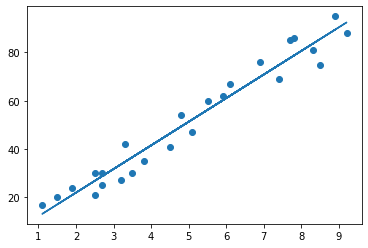

In [20]:

line = reg.coef_*x+reg.intercept_
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

## Testing the data

In [21]:
print(x_test) 


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [23]:
y_predictor = reg.predict(x_test)

In [24]:
y_predictor

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [28]:
#compare predicted vs Actual
Compared_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_predictor})  
Compared_data

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


<AxesSubplot:>

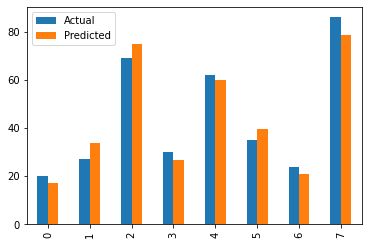

In [32]:
Compared_data.plot(kind='bar')

## Evaluating the model

In [29]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_predictor)) 

Mean Absolute Error: 4.419727808027651


## Predicted score if student studies for 9.25 hours

In [47]:
hours = [[9.25]]
own_predictor = reg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_predictor[0]))


No of Hours = [[9.25]]
Predicted Score = 92.91505723477056


# The predicted score if a student studies for 9.25 hrs will be 92.92